<a href="https://colab.research.google.com/github/2403a52252-ux/NLP/blob/main/NLP_lab(4_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install & Download Dataset

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Install & Download Dataset

In [ ]:
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd


Load Positive and Negative Reviews

In [ ]:
positive_reviews = []
negative_reviews = []

for fileid in movie_reviews.fileids('pos'):
    positive_reviews.append(movie_reviews.raw(fileid))

for fileid in movie_reviews.fileids('neg'):
    negative_reviews.append(movie_reviews.raw(fileid))

print("Positive reviews:", len(positive_reviews))
print("Negative reviews:", len(negative_reviews))


Positive reviews: 1000
Negative reviews: 1000


Text Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    words = []

    for token in tokens:
        if token.isalpha() and token not in stop_words:
            words.append(token)

    return " ".join(words)


Create Clean Corpora

In [ ]:
positive_clean = []
negative_clean = []
for review in positive_reviews:
 clean_text = preprocess(review)
 if clean_text.strip():
        positive_clean.append(clean_text)
for review in negative_reviews:
    clean_text = preprocess(review)
    if clean_text.strip():
        negative_clean.append(clean_text)
print("Clean positive reviews:", len(positive_clean))
print("Clean negative reviews:", len(negative_clean))


Clean positive reviews: 1000
Clean negative reviews: 1000


Compute TF-IDF Separately

In [ ]:
tfidf_positive = TfidfVectorizer(max_features=3000)
tfidf_negative = TfidfVectorizer(max_features=3000)
positive_tfidf_matrix = tfidf_positive.fit_transform(positive_clean)
negative_tfidf_matrix = tfidf_negative.fit_transform(negative_clean)
print("Positive TF-IDF shape:", positive_tfidf_matrix.shape)
print("Negative TF-IDF shape:", negative_tfidf_matrix.shape)


Positive TF-IDF shape: (1000, 3000)
Negative TF-IDF shape: (1000, 3000)


Compute TF-IDF Separately

In [ ]:
def get_top_terms(tfidf_matrix, vectorizer, top_n=15):
    scores = tfidf_matrix.mean(axis=0).A1
    terms = vectorizer.get_feature_names_out()

    df = pd.DataFrame({
        'Term': terms,
        'TF-IDF Score': scores
    })

    return df.sort_values(by='TF-IDF Score', ascending=False).head(top_n)


In [ ]:
top_positive = get_top_terms(positive_tfidf_matrix, tfidf_positive)
top_negative = get_top_terms(negative_tfidf_matrix, tfidf_negative)

top_positive, top_negative


(            Term  TF-IDF Score
 1014        film      0.070067
 1776       movie      0.044743
 1891         one      0.041024
 1573        like      0.028734
 2539       story      0.024015
 1167        good      0.023184
 81          also      0.022290
 1569        life      0.022130
 2708        time      0.021931
 891         even      0.021315
 432    character      0.021140
 434   characters      0.021034
 2982       would      0.020994
 2918        well      0.020371
 1782        much      0.020125,
             Term  TF-IDF Score
 989         film      0.067053
 1761       movie      0.054160
 1872         one      0.041621
 1550        like      0.032050
 864         even      0.026134
 2978       would      0.024256
 1138        good      0.024193
 199          bad      0.023525
 2700        time      0.022786
 2525       story      0.022653
 1111         get      0.022441
 1768        much      0.021756
 429   characters      0.020827
 427    character      0.020826
 1988  

Compute TF-IDF Separately

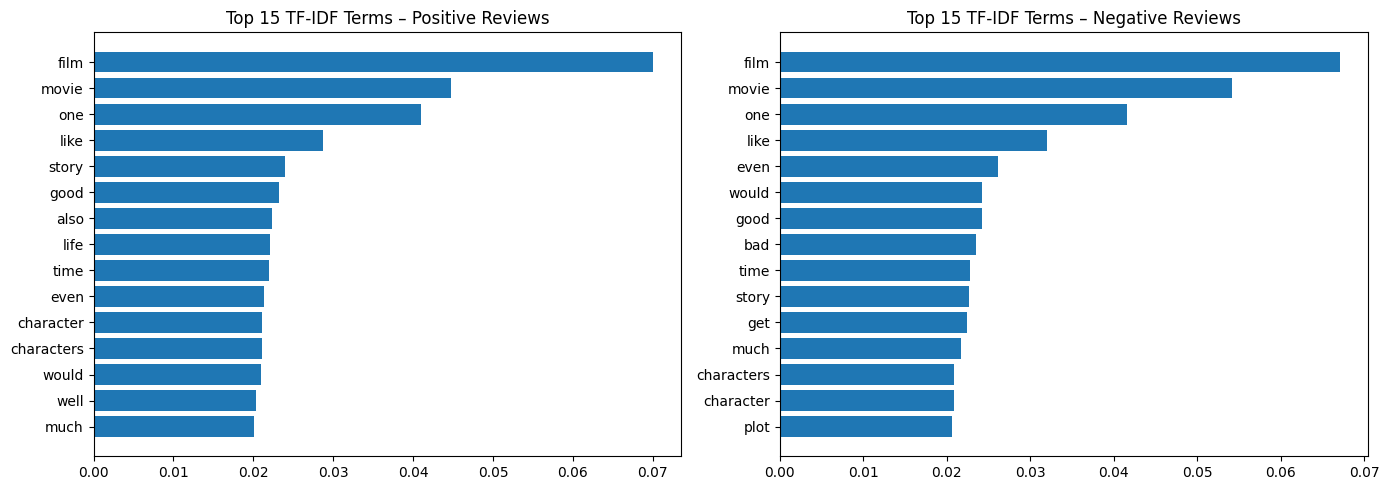

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.barh(top_positive['Term'], top_positive['TF-IDF Score'])
plt.title("Top 15 TF-IDF Terms – Positive Reviews")
plt.gca().invert_yaxis()
plt.subplot(1, 2, 2)
plt.barh(top_negative['Term'], top_negative['TF-IDF Score'])
plt.title("Top 15 TF-IDF Terms – Negative Reviews")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
